In [118]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [119]:
# Memanggil Dataset
Dataset = pd.read_csv('BBRI.JK.csv')
Dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-11,3545.393311,3545.393311,3481.758057,3509.030273,2840.034912,51418628
1,2019-03-12,3527.211914,3536.302490,3463.576416,3490.848877,2825.319824,69851316
2,2019-03-13,3454.485840,3463.576416,3436.304199,3445.395020,2788.531494,51432598
3,2019-03-14,3436.304199,3499.939453,3436.304199,3490.848877,2825.319824,99175072
4,2019-03-15,3545.393311,3590.847168,3536.302490,3590.847168,2906.253662,106867285


In [120]:
# Filter Data
Dataset= Dataset[['Date','High']]
Dataset.head()

,Date,High
0,2019-03-11,3545.393311
1,2019-03-12,3536.302490
2,2019-03-13,3463.576416
3,2019-03-14,3499.939453
4,2019-03-15,3590.847168


In [121]:
# Merubah tipe kolom date menjadi datetime
Dataset['Date'] = pd.to_datetime(Dataset['Date'])
Dataset.head()

,Date,High
0,2019-03-11,3545.393311
1,2019-03-12,3536.302490
2,2019-03-13,3463.576416
3,2019-03-14,3499.939453
4,2019-03-15,3590.847168


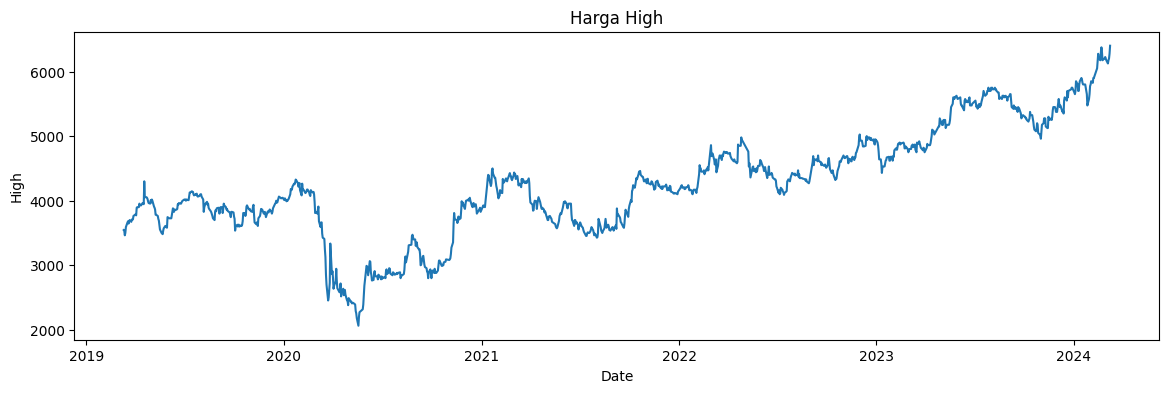

In [122]:
# Visualisasi Data pada dataset
plt.figure(figsize=(14, 4))
sns.lineplot(x=Dataset["Date"], y=Dataset["High"])
plt.title("Harga High")
plt.show()

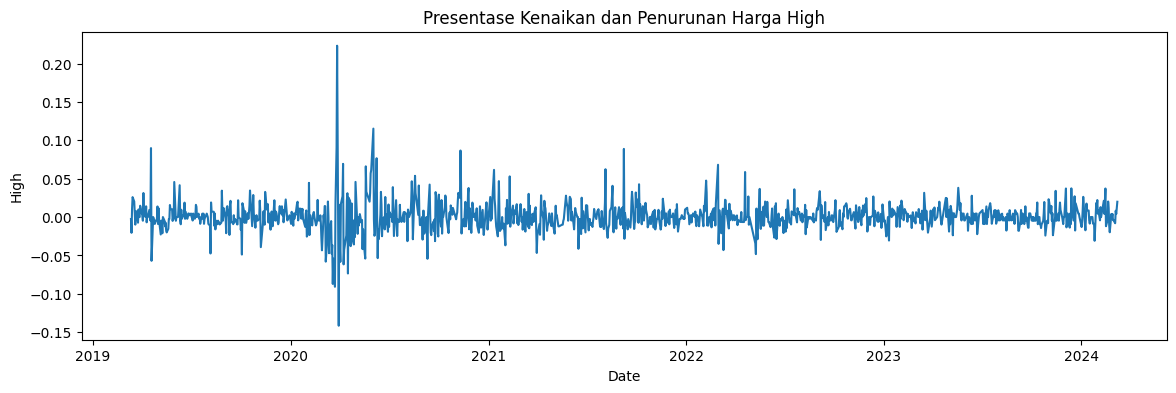

In [123]:
# Visualitasi presentasi kenaikan dan penurunan harga high pada dataset
plt.figure(figsize=(14, 4))
sns.lineplot(x=Dataset["Date"], y=Dataset["High"].pct_change())
plt.title("Presentase Kenaikan dan Penurunan Harga High")
plt.show()

In [124]:
# Ubah nama kolom
Dataset = Dataset.rename(columns={'Date':'ds', 'High':'y'})
Dataset.head()

,ds,y
0,2019-03-11,3545.393311
1,2019-03-12,3536.302490
2,2019-03-13,3463.576416
3,2019-03-14,3499.939453
4,2019-03-15,3590.847168


In [125]:
# Split Data
split_date = pd.to_datetime('2023-03-11')
Dataset_train = Dataset.loc[Dataset['ds'] <= split_date].copy()
Dataset_test = Dataset.loc[Dataset['ds'] > split_date].copy()
Dataset_valid = Dataset.loc[Dataset['ds'] > split_date].copy()

In [126]:
# Mengganti kolom date dan high
Dataset_train.reset_index() \
    .rename(columns={'Date':'ds',
                     'High':'y'}).head()

,index,ds,y
0,0,2019-03-11,3545.393311
1,1,2019-03-12,3536.302490
2,2,2019-03-13,3463.576416
3,3,2019-03-14,3499.939453
4,4,2019-03-15,3590.847168


In [127]:
# Buat model dan latih model
model = Prophet()
model.fit(Dataset_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'High':'y'}))

11:53:21 - cmdstanpy - INFO - Chain [1] start processing
11:53:22 - cmdstanpy - INFO - Chain [1] done processing


In [128]:
# Prediksi data test
Dataset_test_fcst = model.predict(df=Dataset_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

In [129]:
Dataset_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-13,4398.512542,4455.600878,4936.290111,4398.512542,4398.512542,289.276340,289.276340,289.276340,22.651851,22.651851,22.651851,266.624488,266.624488,266.624488,0.0,0.0,0.0,4687.788881
1,2023-03-14,4397.494896,4433.795161,4912.347603,4397.494896,4397.494896,278.772965,278.772965,278.772965,31.159205,31.159205,31.159205,247.613760,247.613760,247.613760,0.0,0.0,0.0,4676.267861
2,2023-03-15,4396.477249,4415.329704,4878.248455,4396.477249,4396.477249,259.425690,259.425690,259.425690,30.459982,30.459982,30.459982,228.965708,228.965708,228.965708,0.0,0.0,0.0,4655.902939
3,2023-03-16,4395.459603,4397.324151,4870.630752,4395.459603,4395.459603,245.103329,245.103329,245.103329,34.295776,34.295776,34.295776,210.807553,210.807553,210.807553,0.0,0.0,0.0,4640.562932
4,2023-03-17,4394.441956,4378.278444,4866.950286,4394.441956,4394.441956,226.923191,226.923191,226.923191,33.666721,33.666721,33.666721,193.256471,193.256471,193.256471,0.0,0.0,0.0,4621.365148


/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


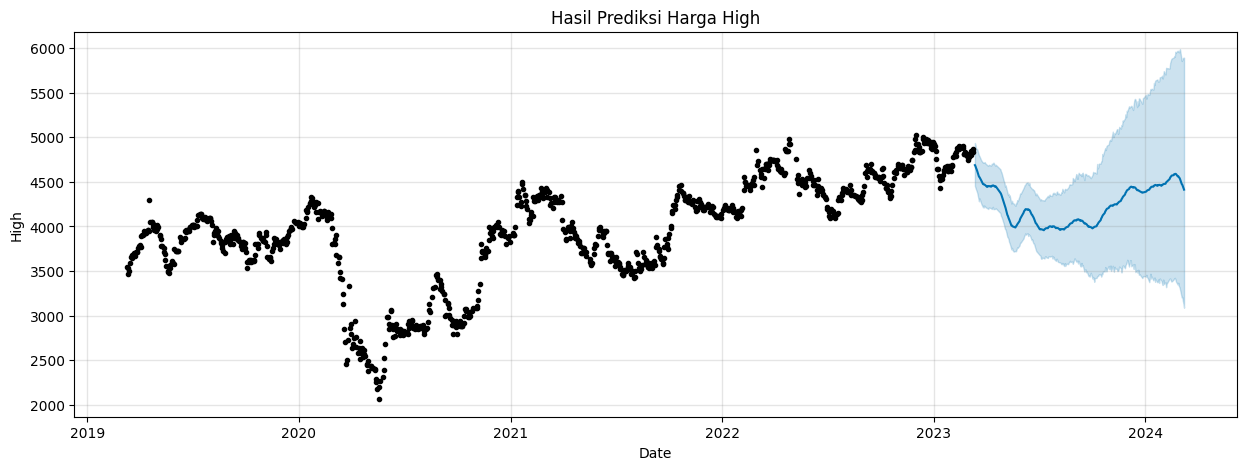

In [130]:
# Visualisasi Prediksi
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(Dataset_test_fcst,ax=ax)
# plt.figure(figsize=(14, 4))
# model.plot(Dataset_test_fcst)
plt.title("Hasil Prediksi Harga High")
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

Text(0.5, 1.0, 'Komponen Prediksi Harga High')

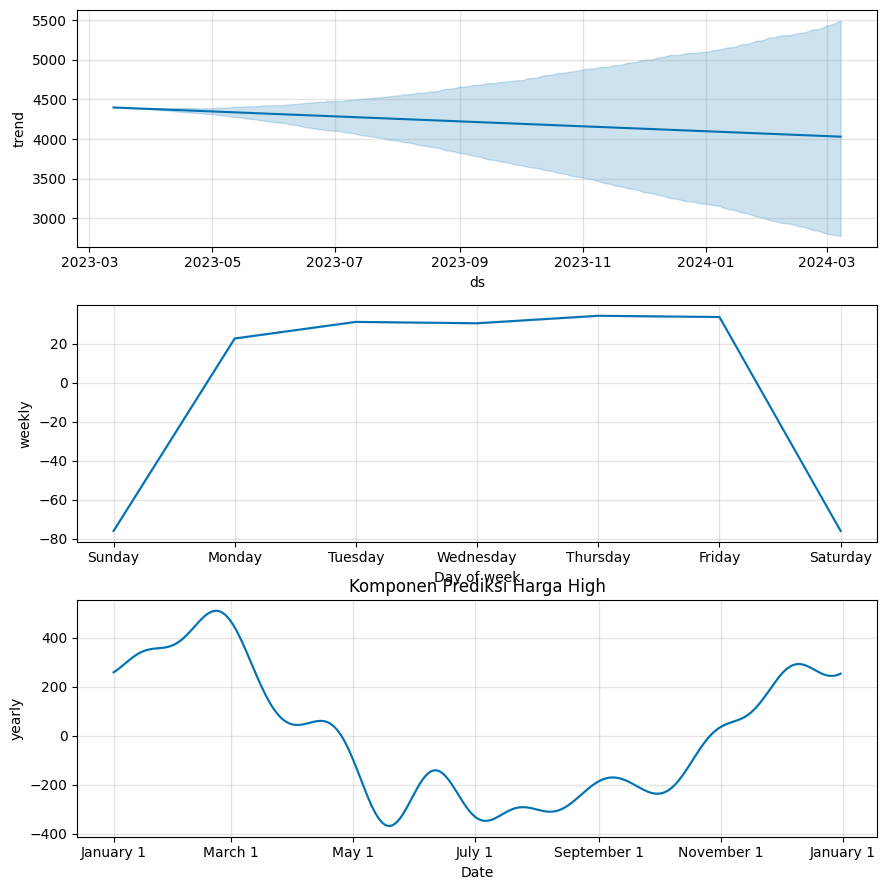

In [131]:
# Viaualisasi komponen dari forecast
fig = model.plot_components(Dataset_test_fcst)
plt.xlabel('Date')
plt.title("Komponen Prediksi Harga High")

/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0, 0.5, 'High')

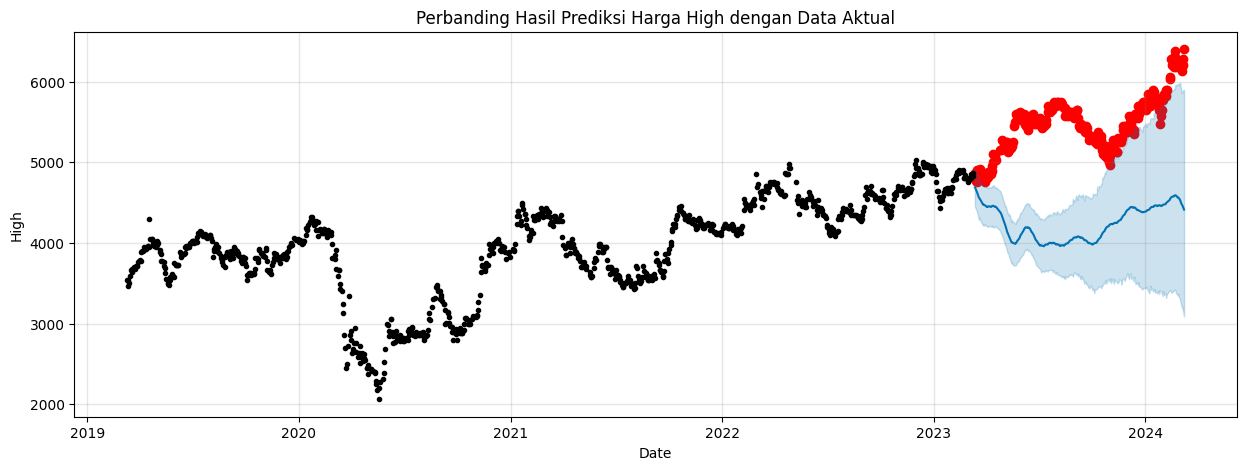

In [132]:
# Visualisasi hasil prediksi dengan data aktual
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(Dataset_test['ds'], Dataset_test['y'], color='r')
fig = model.plot(Dataset_test_fcst, ax=ax)
plt.title("Perbanding Hasil Prediksi Harga High dengan Data Aktual")
plt.xlabel('Date')
plt.ylabel('High')

In [133]:
print("Nilai RMSE:", mean_squared_error(y_true=Dataset_valid['y'], y_pred=Dataset_test_fcst['yhat']))
print("Nilai MAE:", mean_absolute_error(y_true=Dataset_valid['y'], y_pred=Dataset_test_fcst['yhat']))
# import math
# train_size = int(0.85 * len(Dataset))
# test_size = len(Dataset) - train_size
# # score_mae = mean_absolute_error(Dataset_valid, Dataset_test_fcst.tail(test_size)['yhat'])
# # score_rmse = math.sqrt(mean_squared_error(Dataset_valid, Dataset_test_fcst.tail(test_size)['yhat']))

Nilai RMSE: 1692407.4576148258
Nilai MAE: 1240.207783581506


In [134]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Nilai dari MAPE:", mean_absolute_percentage_error(y_true=Dataset_test['y'], y_pred=Dataset_test_fcst['yhat']),"%")

Nilai dari MAPE: 22.324025815911348 %


In [135]:
model = Prophet()
model.fit(Dataset)

11:53:22 - cmdstanpy - INFO - Chain [1] start processing
11:53:23 - cmdstanpy - INFO - Chain [1] done processing


In [136]:
# Melakukan prediksi
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vermikanz/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


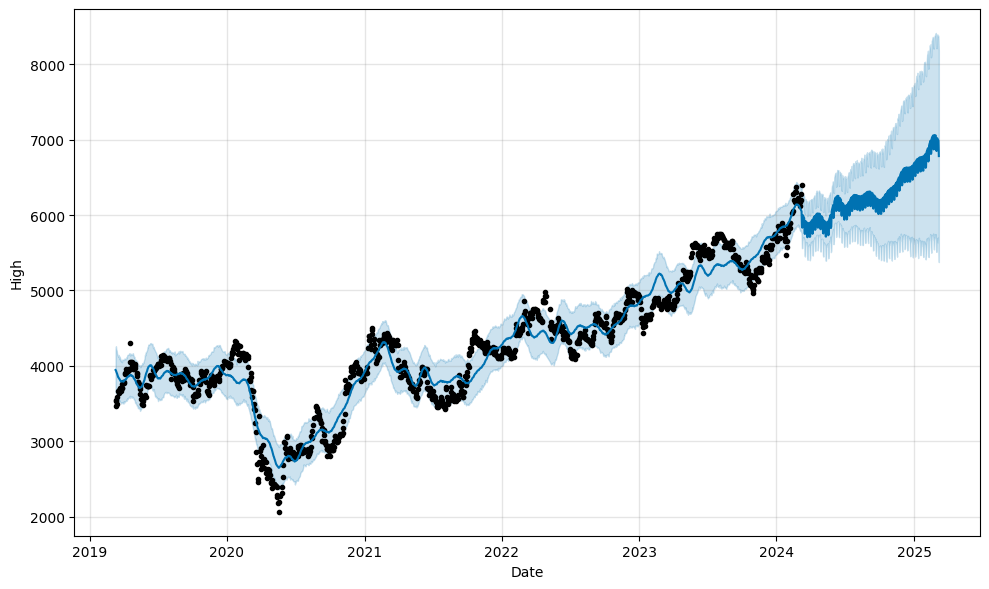

In [137]:
# Plot hasil forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('High')
plt.show()